# Time Series Project

In [5]:
#!pip install -r ../requirements.txt
#!pip install statsmodels

## Step 1:

In Machine Learning ARIMA model is generally a class of statistical models that give outputs which are linearly dependent on their previous values in the combination of stochastic factors.

We need to visualize the data to analyse the trends, seasonalities, and cycles.

We'll start by importing necessary libraries.

In [6]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import statsmodels




warnings.filterwarnings("ignore")


## Step 2:

Load the datasets.

In [2]:
cpu_train_a= 'https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv'

cpu_train_b= 'https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv'

cpu_test_a='https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv'

cpu_test_b='https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv'

In [3]:
train_a= pd.read_csv(cpu_train_a)
test_a = pd.read_csv(cpu_test_a)

train_b = pd.read_csv(cpu_train_b)
test_b = pd.read_csv(cpu_test_b)

In [4]:
train_a.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


In [5]:
test_a.head()

,datetime,cpu
0,2017-01-28 01:42:00,2.19
1,2017-01-28 01:43:00,1.97
2,2017-01-28 01:44:00,2.15
3,2017-01-28 01:45:00,1.94
4,2017-01-28 01:46:00,1.81


In [6]:
train_b.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


In [7]:
test_b.head()

,datetime,cpu
0,2017-01-28 04:42:00,1.71
1,2017-01-28 04:43:00,1.58
2,2017-01-28 04:44:00,1.86
3,2017-01-28 04:45:00,1.66
4,2017-01-28 04:46:00,1.61


In [8]:
train_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  420 non-null    object 
 1   cpu       420 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.7+ KB


In [9]:
test_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  60 non-null     object 
 1   cpu       60 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [10]:
train_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  600 non-null    object 
 1   cpu       600 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


In [11]:
test_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  60 non-null     object 
 1   cpu       60 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


### Preprocess data
**Convert datetime column to index so it's indexed by timestamp**

In [12]:
train_a['datetime'] = pd.to_datetime(train_a['datetime'])
train_a = train_a.set_index('datetime')
train_a.head()

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08


In [13]:
test_a['datetime'] = pd.to_datetime(test_a['datetime'])
test_a = test_a.set_index('datetime')
test_a.head()

,cpu
datetime,
2017-01-28 01:42:00,2.19
2017-01-28 01:43:00,1.97
2017-01-28 01:44:00,2.15
2017-01-28 01:45:00,1.94
2017-01-28 01:46:00,1.81


In [14]:
train_b['datetime'] = pd.to_datetime(train_b['datetime'])
train_b = train_b.set_index('datetime')
train_b.head()

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08


In [15]:
test_b['datetime'] = pd.to_datetime(test_b['datetime'])
test_b = test_b.set_index('datetime')
test_b.head()

,cpu
datetime,
2017-01-28 04:42:00,1.71
2017-01-28 04:43:00,1.58
2017-01-28 04:44:00,1.86
2017-01-28 04:45:00,1.66
2017-01-28 04:46:00,1.61


## Step 3:

### Use matplotlib visualize the data.

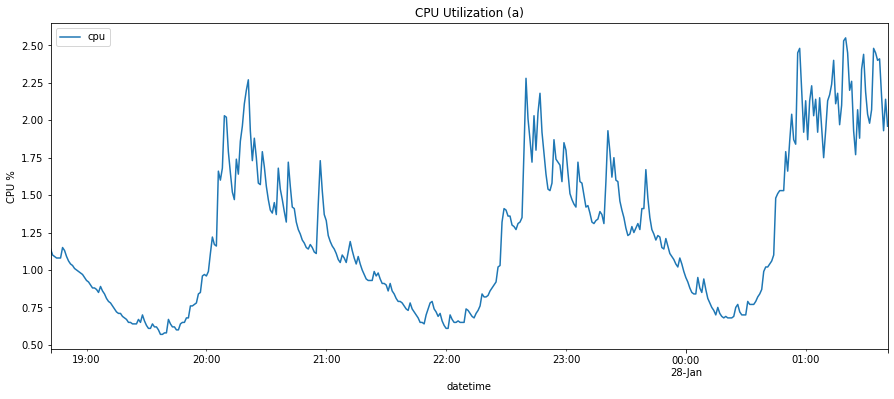

In [16]:
train_a.plot(figsize=(15,6))
plt.ylabel('CPU %')
plt.title('CPU Utilization (a)')
plt.show()

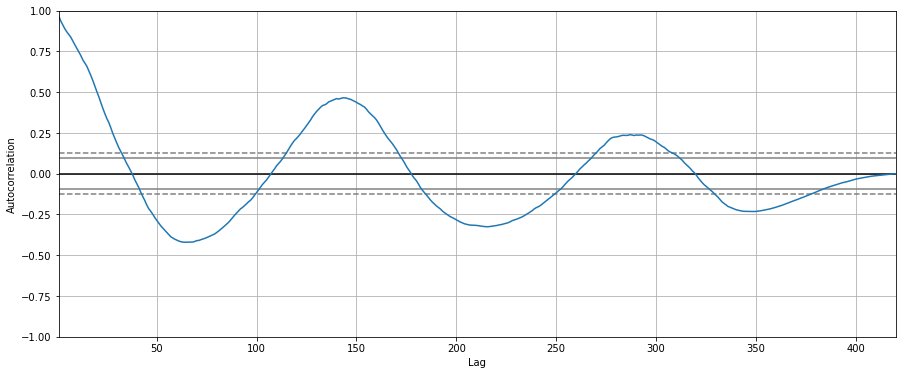

In [17]:
plt.figure(figsize=(15,6))
autocorrelation_plot(train_a)
plt.show()

<Figure size 1080x432 with 0 Axes>

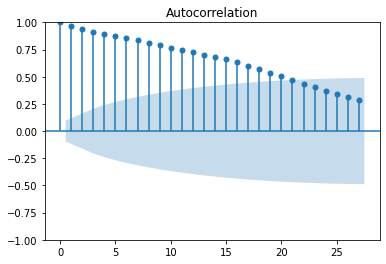

In [18]:
plt.figure(figsize=(15,6))
plot_acf(train_a)
plt.show()

**Is Stationarity important for time series analysis?**

"In most cases it is important. This is because much statistical analysis or model is built upon the assumption that mean and variance are consistent over time."

In [19]:

def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

In [20]:
test_stationarity(train_a, 'cpu')

'Non-Stationary'

The test results and plots show us that the data is non-stationary, which means the data doesn’t have constant mean, variance, and autocorrelation. To convert the data into stationary we can do differencing for the data, at least a difference order of 1.

## Step 4:

Use the ARIMA model to fit the data.

**Grid Search for Arima Hyperparameters**

- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.

In [21]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(tr,tst, arima_order):
	# prepare training dataset
	
	train, test =  tr.values, tst.values
	
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

In [22]:
# evaluate combinations of p, d and q values for an ARIMA model

def evaluate_models(train,test, p_values, d_values, q_values):
	
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(train,test,order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score)) 

In [23]:
#grid search ARIMA parameters for time series
warnings.filterwarnings("ignore")

# p_values = [0, 1, 2, 4, 6, 8, 10]
# d_values = range(0, 3)
# q_values = range(0, 3)
# evaluate_models(train_a,test_a, p_values, d_values, q_values)

Best ARIMA(6, 2, 1) RMSE=0.092

### Fit model

In [24]:
# fit model

model = ARIMA(train_a, order=(6,2,1))
model_fit = model.fit()

## Step 5:

### Evaluate the performance of the model

In [25]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    cpu   No. Observations:                  420
Model:                 ARIMA(6, 2, 1)   Log Likelihood                 282.517
Date:                Sat, 06 Aug 2022   AIC                           -549.034
Time:                        03:58:37   BIC                           -516.750
Sample:                    01-27-2017   HQIC                          -536.271
                         - 01-28-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0983      0.035     -2.807      0.005      -0.167      -0.030
ar.L2         -0.1949      0.040     -4.862      0.000      -0.273      -0.116
ar.L3         -0.0697      0.037     -1.865      0.0

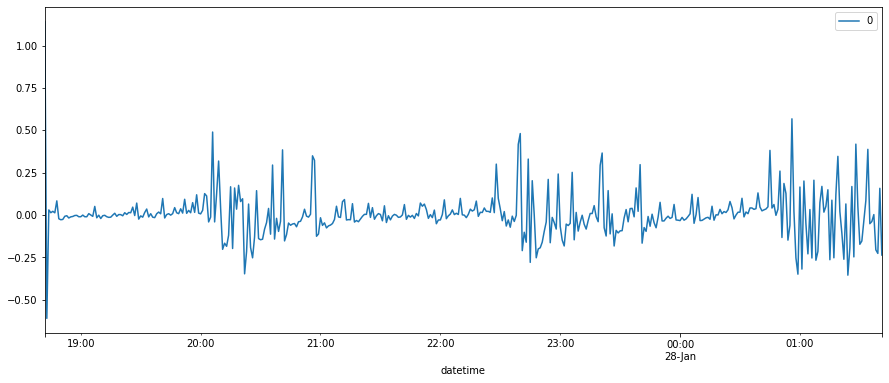

In [26]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(15,6))
plt.show()

<Figure size 1080x432 with 0 Axes>

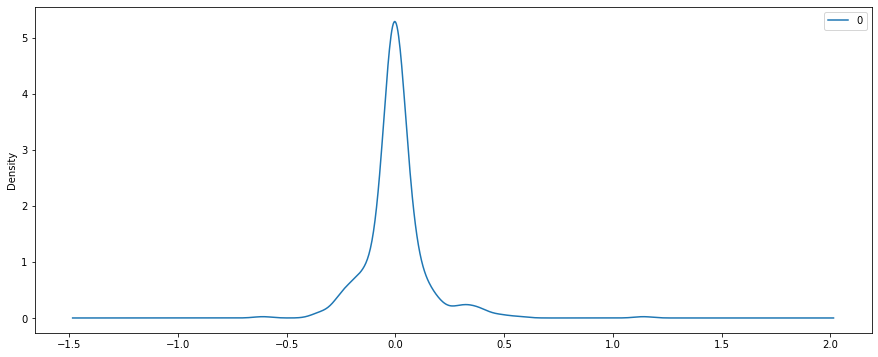

In [27]:
# density plot of residuals
plt.figure(figsize=(15,6))
residuals.plot(kind='kde',figsize=(15,6))
plt.show()

In [28]:
# summary stats of residuals
print(residuals.describe())

                0
count  420.000000
mean     0.001962
std      0.137789
min     -0.610000
25%     -0.039854
50%     -0.002915
75%      0.034503
max      1.140000


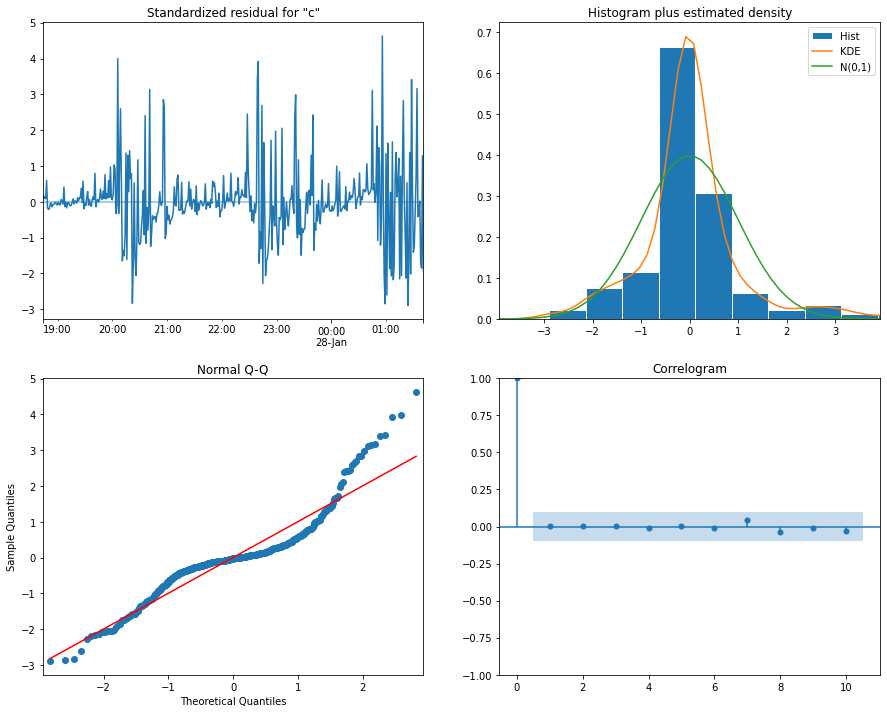

In [29]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

## Step 6:

### Predict

In [30]:

train, test = train_a.values, test_a.values


history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(6,2,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1.997523, expected=2.190000
predicted=2.260100, expected=1.970000
predicted=1.961720, expected=2.150000
predicted=2.175899, expected=1.940000
predicted=1.910506, expected=1.810000
predicted=1.851566, expected=1.670000
predicted=1.675893, expected=1.610000
predicted=1.648975, expected=1.580000
predicted=1.596868, expected=1.920000
predicted=1.922781, expected=2.060000
predicted=2.015701, expected=1.870000
predicted=1.831765, expected=1.810000
predicted=1.759153, expected=1.670000
predicted=1.622052, expected=1.560000
predicted=1.562268, expected=1.560000
predicted=1.587470, expected=1.570000
predicted=1.593952, expected=1.570000
predicted=1.573958, expected=1.560000
predicted=1.546144, expected=1.530000
predicted=1.501488, expected=1.560000
predicted=1.525203, expected=1.480000
predicted=1.449948, expected=1.480000
predicted=1.460476, expected=1.490000
predicted=1.461969, expected=1.460000
predicted=1.439864, expected=1.370000
predicted=1.354091, expected=1.320000
predicted=1.

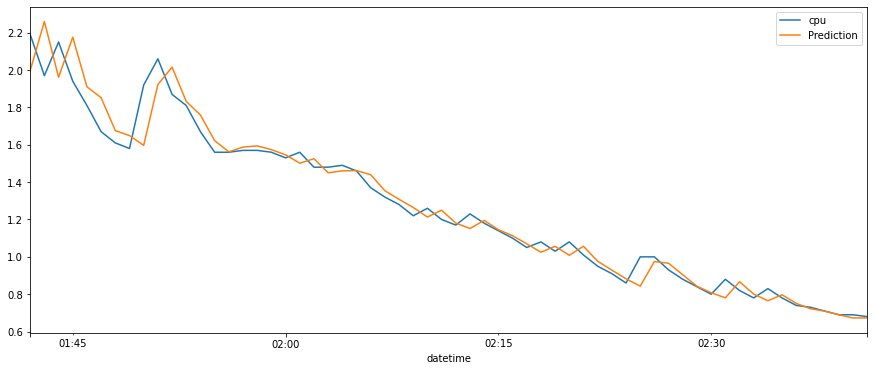

In [31]:
# plot forecasts against actual outcomes

future_forecast = pd.DataFrame(predictions,index = test_a.index,columns=['Prediction']) #Create Dataset with predictions

pd.concat([test_a,future_forecast],axis=1).plot(figsize=(15,6))
plt.show()

In [32]:
future_forecast['Actual'] = test_a['cpu']
future_forecast.head(60)

,Prediction,Actual
datetime,,
2017-01-28 01:42:00,1.997523,2.19
2017-01-28 01:43:00,2.260100,1.97
2017-01-28 01:44:00,1.961720,2.15
2017-01-28 01:45:00,2.175899,1.94
2017-01-28 01:46:00,1.910506,1.81
2017-01-28 01:47:00,1.851566,1.67
2017-01-28 01:48:00,1.675893,1.61
2017-01-28 01:49:00,1.648975,1.58
2017-01-28 01:50:00,1.596868,1.92


### Plot last 100 values and 60 forecasted values against actual outcomes

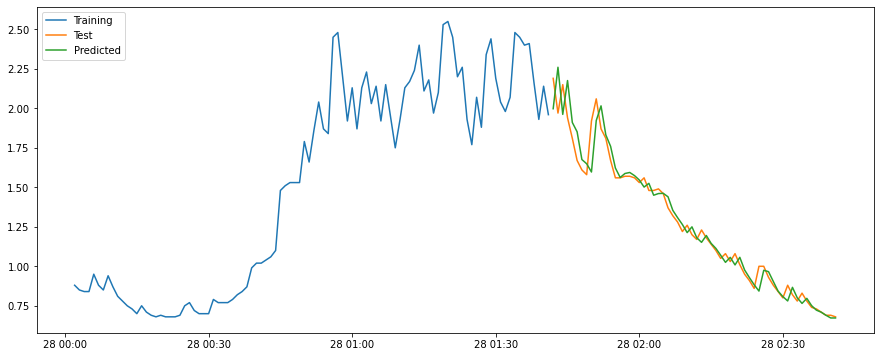

In [33]:
plt.figure(figsize=(15,6))
plt.plot(train_a[-100:],label="Training") #Last 100 values of train data
plt.plot(test_a,label="Test")             # Test data
plt.plot(future_forecast.Prediction,label="Predicted") #Prediction
plt.legend(loc = 'upper left')
plt.show()

### Metrics to evaluate forecasts

- Mean Forecast Error (or Forecast Bias): A mean forecast error value other than zero suggests a tendency of the model to over forecast (negative error) or under forecast (positive error). A forecast bias of zero, or a very small number near zero, shows an unbiased model.


In [34]:
forecast_errors = [test[i]-predictions[i] for i in range(len(test))]
bias = sum(forecast_errors) * 1.0/len(test)
print('Bias: %f' % bias)

Bias: -0.006497


- The mean absolute error, or MAE, is calculated as the average of the forecast error values, where all of the forecast error values are forced to be positive.  A mean absolute error of zero indicates no error.

In [35]:
mae = mean_absolute_error(test, predictions)
print('MAE: %f' % mae)

MAE: 0.059485


- The mean squared error, or MSE, is calculated as the average of the squared forecast error values. Squaring the forecast error values forces them to be positive; it also has the effect of putting more weight on large errors.

In [36]:
mse = mean_squared_error(test, predictions)
print('MSE: %f' % mse)

MSE: 0.008460


- The RMSE error values are in the same units as the predictions. As with the mean squared error, an RMSE of zero indicates no error.

In [37]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.092


## Step 7:

Let’s perform the same anomaly detection on another segment of the CPU utilization dataset captured at a different time by using the cpu-train-b

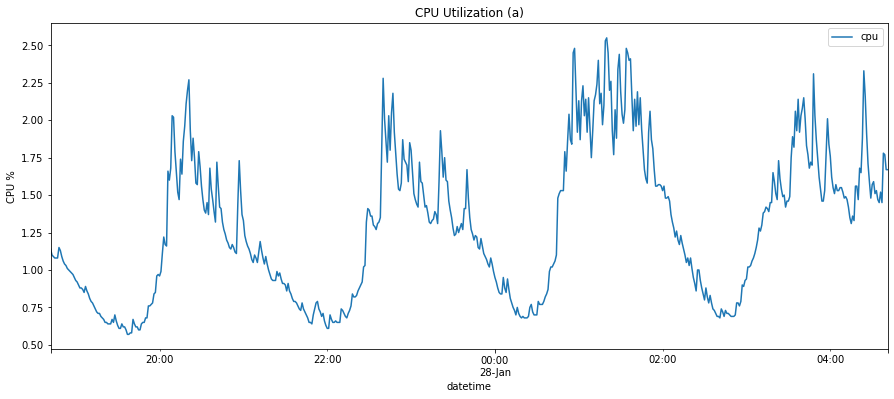

In [38]:
train_b.plot(figsize=(15,6))

plt.ylabel('CPU %')
plt.title('CPU Utilization (a)')
plt.show()

In [39]:
trainb, testb = train_b.values, test_b.values

history_b = [x for x in trainb]
predictions_b = list()

for t in range(len(testb)):
	model_b = ARIMA(history_b, order=(6,2,1))
	model_fit_b = model_b.fit()
	output_b = model_fit_b.forecast()
	yhat_b = output_b[0]
	predictions_b.append(yhat_b)
	obs_b = testb[t]
	history_b.append(obs_b)
	
	print('predicted=%f, expected=%f' % (yhat_b, obs_b))

predicted=1.635365, expected=1.710000
predicted=1.686246, expected=1.580000
predicted=1.588724, expected=1.860000
predicted=1.870324, expected=1.660000
predicted=1.662745, expected=1.610000
predicted=1.630043, expected=1.520000
predicted=1.521872, expected=1.430000
predicted=1.451691, expected=1.340000
predicted=1.378550, expected=1.300000
predicted=1.336651, expected=1.620000
predicted=1.624259, expected=1.530000
predicted=1.526700, expected=0.040000
predicted=0.107440, expected=0.070000
predicted=0.203319, expected=0.030000
predicted=0.056203, expected=0.070000
predicted=0.205100, expected=0.030000
predicted=0.087919, expected=0.040000
predicted=-0.013074, expected=0.060000
predicted=-0.067751, expected=0.050000
predicted=-0.056169, expected=0.070000
predicted=-0.021873, expected=0.090000
predicted=0.005980, expected=0.040000
predicted=-0.036347, expected=0.070000
predicted=0.004686, expected=0.030000
predicted=-0.034096, expected=0.050000
predicted=-0.002164, expected=0.050000
predi

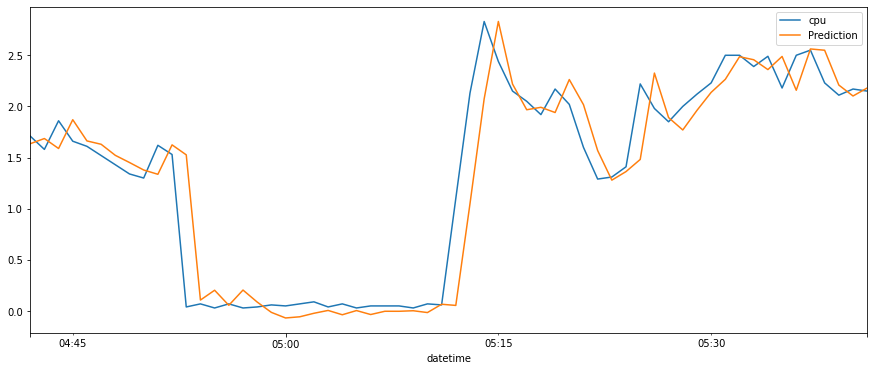

In [40]:

future_forecast_b = pd.DataFrame(predictions_b,index = test_b.index,columns=['Prediction']) #Create Dataset with predictions

pd.concat([test_b,future_forecast_b],axis=1).plot(figsize=(15,6))
plt.show()

In [41]:
future_forecast_b['Actual'] = test_b['cpu']
future_forecast_b.head(60)

,Prediction,Actual
datetime,,
2017-01-28 04:42:00,1.635365,1.71
2017-01-28 04:43:00,1.686246,1.58
2017-01-28 04:44:00,1.588724,1.86
2017-01-28 04:45:00,1.870324,1.66
2017-01-28 04:46:00,1.662745,1.61
2017-01-28 04:47:00,1.630043,1.52
2017-01-28 04:48:00,1.521872,1.43
2017-01-28 04:49:00,1.451691,1.34
2017-01-28 04:50:00,1.378550,1.30


### Plot last 100 values and 60 forecasted values against actual outcomes

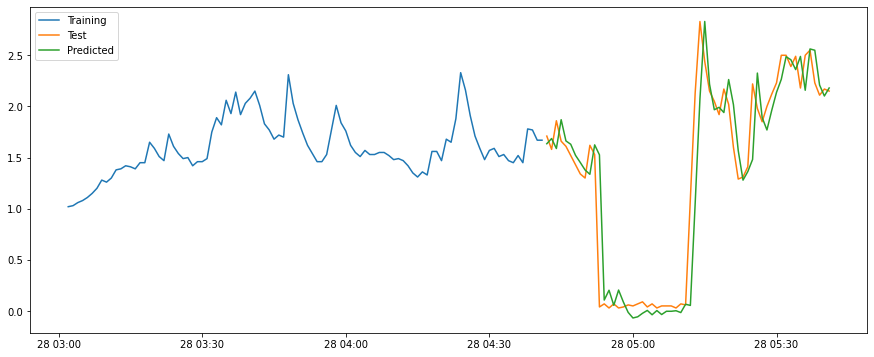

In [42]:
plt.figure(figsize=(15,6))
plt.plot(train_b[-100:],label="Training") #Last 100 values of train data
plt.plot(test_b,label="Test")             # Test data
plt.plot(future_forecast_b.Prediction,label="Predicted") #Prediction
plt.legend(loc = 'upper left')
plt.show()

### Metrics to evaluate forecasts

In [43]:
forecast_errors = [testb[i]-predictions_b[i] for i in range(len(testb))]
bias = sum(forecast_errors) * 1.0/len(testb)
print('Bias: %f' % bias)

Bias: 0.022407


In [44]:
mae = mean_absolute_error(testb, predictions_b)
print('MAE: %f' % mae)

MAE: 0.204858


In [45]:
mse = mean_squared_error(testb, predictions_b)
print('MSE: %f' % mse)

MSE: 0.119158


In [46]:
rmse = sqrt(mean_squared_error(testb, predictions_b))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.345



Sources:

- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


- https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

- https://analyticsindiamag.com/a-guide-to-different-evaluation-metrics-for-time-series-forecasting-models/

- https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/